### Import essential libraries

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression

### Load the main image the cropped template

In [5]:
# load the main image and convert to grayscale
image_path = './coins.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the template image and convert to grayscale
template_path = './template.png'
template = cv2.imread(template_path)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

### Find matching rectangles with different scaled template

In [6]:
# initialize list to store match coordinates
rectangles = []

# iterate over different scales to resize the template
for scale in np.linspace(0.5, 1.5, 20):
    # resize the template
    resized_template = cv2.resize(gray_template, (0, 0), fx=scale, fy=scale)
    h, w = resized_template.shape 

    # perform template matching
    result = cv2.matchTemplate(gray_image, resized_template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8 
    loc = np.where(result >= threshold)

    # store matched locations
    for pt in zip(*loc[::-1]):
        rectangles.append((pt[0], pt[1], pt[0] + w, pt[1] + h))

# convert rectangles to a numpy array
rectangles = np.array(rectangles)

### Apply NMS

In [7]:
# apply NMS using imutils
pick = non_max_suppression(rectangles, probs=None, overlapThresh=0.3)

### Show the result

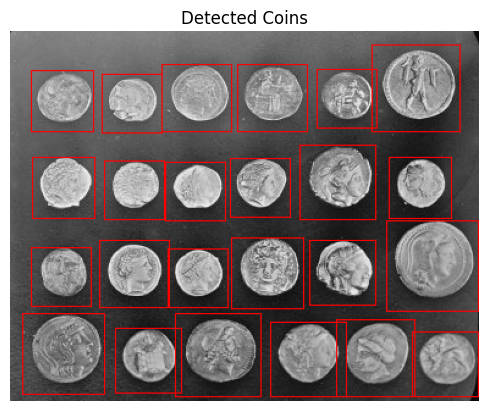

Number of found coins: 24


In [8]:
# draw rectangles around matched regions
found_coins = len(pick)
for (startX, startY, endX, endY) in pick:
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 1)

# display and print the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Coins')
plt.show()

print("Number of found coins:", found_coins)